In [1]:
import numpy as np  

import anndata

import cellpath as cp
import cellpath.visual as visual
import cellpath.benchmark as bmk 
import cellpath.de_analy as de

# CellPath

In [2]:
num_trajs = 4
num_metacells = 400

In [3]:
# calculate and formulate the anndata

# import pandas as pd
# import scanpy as sc
# from scipy.sparse import csr_matrix
# path = "./sim_data/Symsim/cycle_tree_rand1/"
# cell_labels = pd.read_csv(path + "cell_labels.txt", sep = "\t")
# cell_labels.head()
# cell_labels = cell_labels.rename({"true_time": "sim_time"}, axis = "columns")
# spliced_counts = pd.read_csv(path + "spliced_counts.txt", sep = "\t", header = None).values
# unspliced_counts = pd.read_csv(path + "unspliced_counts.txt", sep = "\t", header = None).values
# adata = anndata.AnnData(X = csr_matrix(spliced_counts.T), obs = cell_labels)
# adata.layers["spliced"] = csr_matrix(spliced_counts.T)
# adata.layers["unspliced"] = csr_matrix(unspliced_counts.T)
# sc.tl.umap(adata)

In [4]:
# read in simulated dataset
# not pre-clustered
# adata = anndata.read_h5ad("./sim_data/Symsim/cycle_tree_rand1.h5ad")
# pre-clustered
adata = anndata.read_h5ad("./sim_data/Symsim/cycle_tree_rand1_clust.h5ad")

## All in one CellPath

In [5]:
cellpath_obj = cp.CellPath(adata = adata, preprocess = True)
cellpath_obj.all_in_one(num_metacells = num_metacells, n_neighs = 10, pruning = False, num_trajs = num_trajs, insertion = True, prop_insert = 0.000)

Already conducted clustering
Meta-cell constructed
Meta-cell level neighborhood graph constructed
cut off small paths and conduct quality control
selected path (starting_ending):
start_end:  116_272 , len:  54 newly covered: 54
start_end:  116_21 , len:  51 newly covered: 19
start_end:  116_57 , len:  54 newly covered: 10
start_end:  116_65 , len:  51 newly covered: 9
start_end:  116_46 , len:  53 newly covered: 3
start_end:  116_323 , len:  53 newly covered: 3
start_end:  116_92 , len:  50 newly covered: 5
start_end:  116_395 , len:  54 newly covered: 2
start_end:  116_126 , len:  54 newly covered: 2
start_end:  116_359 , len:  53 newly covered: 2
start_end:  116_23 , len:  54 newly covered: 1
start_end:  116_75 , len:  54 newly covered: 1
start_end:  116_131 , len:  54 newly covered: 1
start_end:  116_154 , len:  54 newly covered: 1
start_end:  116_290 , len:  54 newly covered: 1
start_end:  116_333 , len:  54 newly covered: 1
start_end:  116_340 , len:  54 newly covered: 1
start_end

In [6]:
# pseudo-time assignment result
cellpath_obj.pseudo_order

,traj_0,traj_1,traj_2,traj_3
cell_0,NaN,NaN,NaN,NaN
cell_1,NaN,NaN,NaN,NaN
cell_2,NaN,NaN,NaN,NaN
cell_3,NaN,NaN,NaN,NaN
cell_4,NaN,NaN,NaN,NaN
...,...,...,...,...
cell_789,NaN,NaN,NaN,NaN
cell_790,NaN,NaN,NaN,NaN
cell_791,NaN,NaN,NaN,NaN
cell_792,NaN,NaN,NaN,NaN


## Visualization

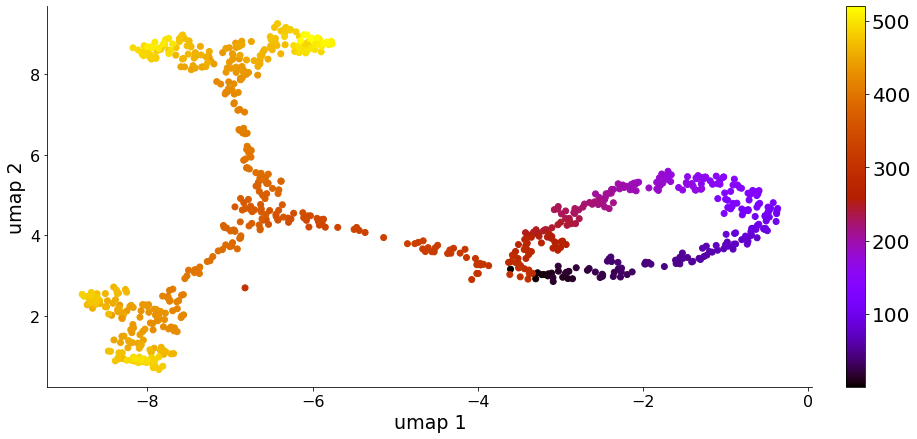

In [7]:
visual.plot_data(cellpath_obj, basis = "umap", figsize = (15,7), axis = True)

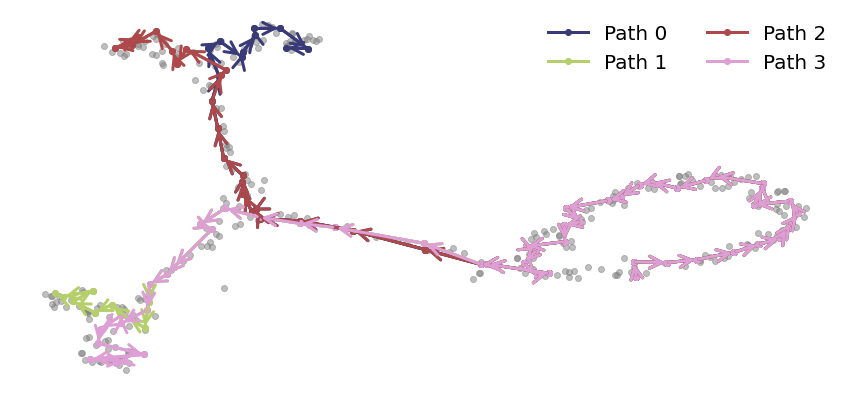

In [10]:
visual.meta_traj_visual(cellpath_obj, basis="umap", figsize = (15,7), trajs = num_trajs)

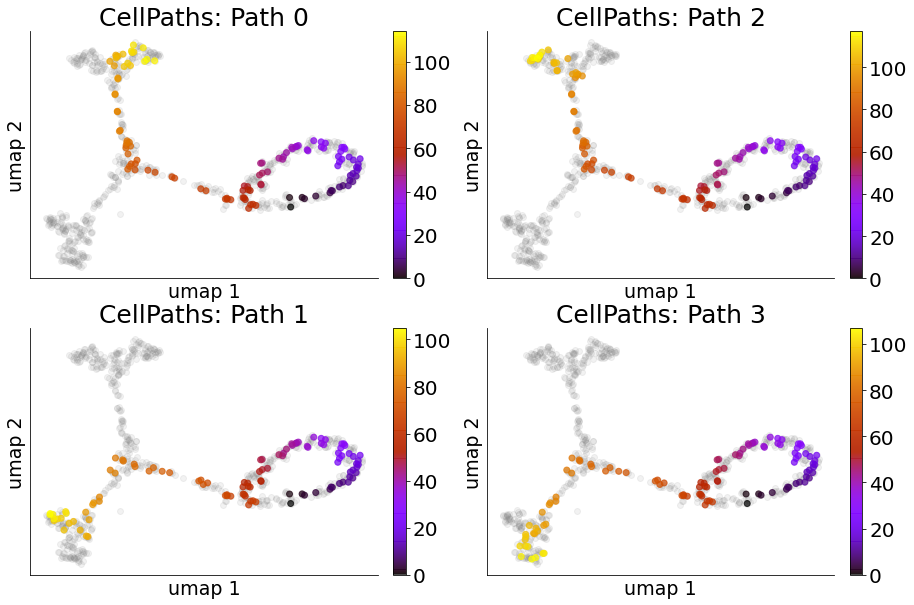

In [14]:
visual.first_order_approx_pt(cellpath_obj, basis="umap", trajs = num_trajs, figsize=(15,10), save_as= "None.pdf")

## Benchmark
* **Differentially expressed genes**: Gene is annotated as index since the dataset is simulated data. 

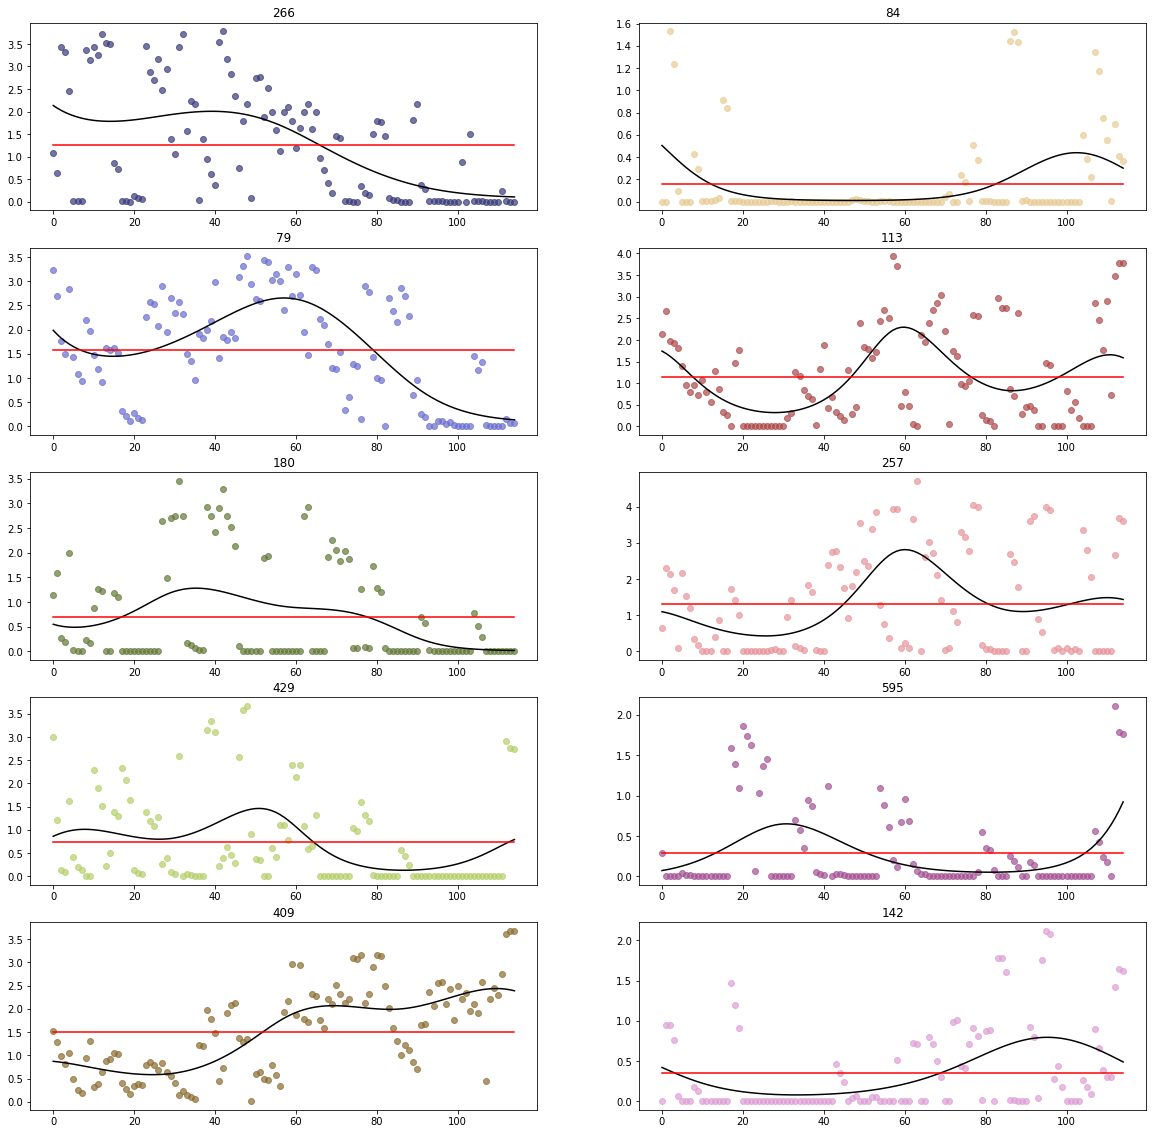

In [10]:
de_genes = de.de_analy(cellpath_obj, p_val_t = 0.05, verbose = False)
de.de_plot(cellpath_obj, {"traj_0": de_genes["traj_0"]}, figsize = (20,20), n_genes = 10, save_path = None)